In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mygenome/genome_zeeshan_usmani.csv
/kaggle/input/mygenome/Child 2 Genome.csv
/kaggle/input/mygenome/genome_file_description.csv
/kaggle/input/mygenome/Father Genome.csv
/kaggle/input/mygenome/Child 3 Genome.csv
/kaggle/input/mygenome/Child 1 Genome.csv
/kaggle/input/mygenome/Mother Genome.csv


# Author : Quratul Ain
# Contact: qurat-zee@hotmail.com

# About Dataset

> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/zusmani/mygenome?select=genome_zeeshan_usmani.csv)


Content
Name: Zeeshan-ul-hassan Usmani

Age: 38 Years

Country of Birth: Pakistan

Country of Ancestors: India (Utter Pradesh - UP)

File: GenomeZeeshanUsmani.csv

Size: 15 MB

Sources: 23andMe Personalized Genome Report

The research community is still progressively working in this domain and it is agreed upon by professionals that genomics is still in its infancy. You now have the chance to explore this novel domain via the dataset and become one of the few genomics early adopters.

The data-set is a complete genome extracted from www.23andme.com and is represented as a sequence of SNPs represented by the following symbols: A (adenine), C (cytosine), G (guanine), T (thymine), D (base deletions), I (base insertions), and '_' or '-' if the SNP for particular location is not accessible. It contains Chromosomes 1-22, X, Y, and mitochondrial DNA.

A complete list of the exact SNPs (base pairs) available and their data-set index can be found at
https://api.23andme.com/res/txt/snps.b4e00fe1db50.data

For more information about how the data-set was extracted follow https://api.23andme.com/docs/reference/#genomes

Moreover, for a more detailed understanding of the data-set content please acquaint yourself with the description of https://api.23andme.com/docs/reference/#genotypes

## Inspiration
Some ideas worth exploring:

Is the individual in question more susceptible to cancer?\
Does he tend to gain weight?\
Where is his place of origin?\
Which gene determines certain biological feature (cancer susceptibility, fat generation rate, hair color etc.\
How does this phenotype SNPs compare with other similar datasets from the western-world?\
What would be the likely cause of death for this person?\
What are the most likely diseases/illnesses this person is going to face in lifetime?\
What is unique about this dataset?\
What else you can extract from this dataset when it comes to personal trait, intelligence level, ancestry and body makeup?

## **Importing Libraries and Data Loading**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mygenome/genome_zeeshan_usmani.csv
/kaggle/input/mygenome/Child 2 Genome.csv
/kaggle/input/mygenome/genome_file_description.csv
/kaggle/input/mygenome/Father Genome.csv
/kaggle/input/mygenome/Child 3 Genome.csv
/kaggle/input/mygenome/Child 1 Genome.csv
/kaggle/input/mygenome/Mother Genome.csv


In [3]:
# Loading Dataset
genome = pd.read_csv("../input/mygenome/genome_zeeshan_usmani.csv")


In [4]:
# Bird eye view of data
genome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610544 entries, 0 to 610543
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   # rsid      610544 non-null  object
 1   chromosome  610544 non-null  object
 2   position    610544 non-null  int64 
 3   genotype    610544 non-null  object
dtypes: int64(1), object(3)
memory usage: 18.6+ MB


In [5]:
# Checking total number of rows and columns
genome.shape

(610544, 4)

In [6]:
# Getting familiar with data
genome.head()

,# rsid,chromosome,position,genotype
0,rs12564807,1,734462,AA
1,rs3131972,1,752721,AG
2,rs148828841,1,760998,AC
3,rs12124819,1,776546,AA
4,rs115093905,1,787173,GG


# Data Cleaning

In [7]:
genome.columns

Index(['# rsid', 'chromosome', 'position', 'genotype'], dtype='object')

In [8]:
# Checking null values
genome.isnull().sum()

# rsid        0
chromosome    0
position      0
genotype      0
dtype: int64

In [9]:
# Checking duplicates
genome.duplicated().sum()

0

In [10]:
# Dealing with column

#Rename first column as RSID by removing # sign
genome.rename(columns={'# rsid':'rsid'}, inplace=True)
genome.head(10)


,rsid,chromosome,position,genotype
0,rs12564807,1,734462,AA
1,rs3131972,1,752721,AG
2,rs148828841,1,760998,AC
3,rs12124819,1,776546,AA
4,rs115093905,1,787173,GG
5,rs11240777,1,798959,GG
6,rs7538305,1,824398,AA
7,rs4970383,1,838555,AA
8,rs4475691,1,846808,TT
9,rs7537756,1,854250,GG


In [11]:
# checking column data type

column_dtypes = genome.dtypes
column_dtypes

rsid          object
chromosome    object
position       int64
genotype      object
dtype: object

In [12]:
# checking unique value in each column
columns = ['rsid', 'chromosome', 'position', 'genotype']

# Get the unique values of the selected columns
unique_values = genome[columns].apply(pd.Series.unique)

# Print the unique values
print(unique_values)

rsid          [rs12564807, rs3131972, rs148828841, rs1212481...
chromosome    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
position      [734462, 752721, 760998, 776546, 787173, 79895...
genotype      [AA, AG, AC, GG, TT, CC, II, DD, GT, CT, --, C...
dtype: object


In [13]:
genome['genotype'].value_counts()

genotype
CC    112479
GG    112108
TT     88446
AA     88386
CT     66557
AG     66433
GT     15299
AC     15229
II     10634
--      7125
C       6028
G       5748
A       5365
T       4964
DD      3604
CG       787
I        661
AT       430
D        213
DI        48
Name: count, dtype: int64

>- After completing our first step i.e Data cleaning we observe the following points
>- Data donot contain any null value, duplicates and data type is already in correct format.
>- Lets proceed to data exploration

# Data Exploration

In [14]:
genome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610544 entries, 0 to 610543
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   rsid        610544 non-null  object
 1   chromosome  610544 non-null  object
 2   position    610544 non-null  int64 
 3   genotype    610544 non-null  object
dtypes: int64(1), object(3)
memory usage: 18.6+ MB


In [15]:
# Data Analysis using pandas profiling
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
chex 0.1.84 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pins 0.8.3 requires fsspec<2023.9.0,>=0.8.0, but you have fsspec 2023.10.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=

In [16]:
#generating profile report 
import pandas_profiling
profile = genome.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualizaion

In [17]:
# visualizing Chromosomes with the genotype
chromosome_counts = genome['chromosome'].value_counts()
chromosome_counts

chromosome
1     47742
2     46815
6     40965
3     39186
5     34900
4     34386
7     33552
8     30651
11    29883
10    29592
12    29068
9     27010
13    21882
16    19680
X     19588
17    19364
14    19002
15    18660
20    14730
18    14696
19    13948
22     9307
21     8571
MT     3287
Y      2129
18     1950
Name: count, dtype: int64

In [18]:
import plotly.express as px
chromosome_counts = genome['chromosome'].value_counts()
chromosome_counts_df = pd.DataFrame({'Chromosome': chromosome_counts.index, 'Count': chromosome_counts.values})

fig = px.pie(chromosome_counts_df, values='Count', names='Chromosome')
fig.update_layout(title='Chromosomes Distribution')
fig.show()

<Figure size 800x600 with 0 Axes>

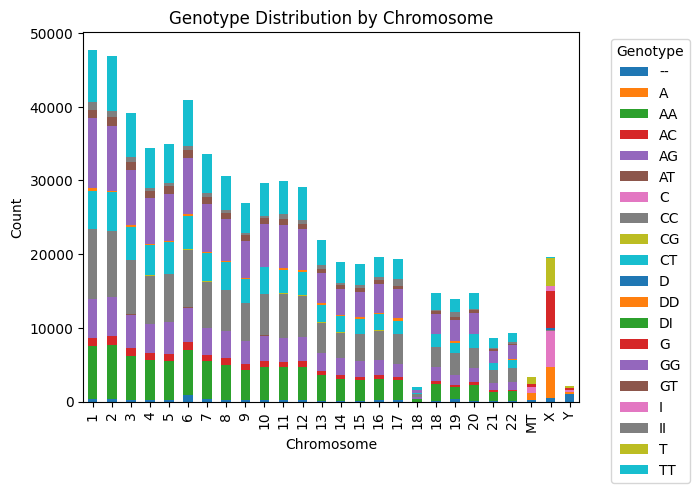

In [19]:
grouped_genome = genome.groupby(['chromosome', 'genotype']).size().unstack()

# Create the stacked bar plot
plt.figure(figsize=(8, 6))
grouped_genome.plot(kind='bar', stacked=True)
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('Genotype Distribution by Chromosome')
plt.legend(title='Genotype', bbox_to_anchor=(1.05, 1))
plt.show()

# Inspiration
## Some ideas worth exploring:
---------------------------------
> **Is the individual in question more susceptible to cancer?**


In [20]:
filter_rsid = ['rs4444903','rs6983267','rs4633','rs1219648','rs2987983','rs2987983','rs1045485','rs351855']
filtered_data = genome[genome['rsid'].isin(filter_rsid)]
filtered_data

,rsid,chromosome,position,genotype
85460,rs1045485,2,202149589,GG
153662,rs4444903,4,110834110,GG
201975,rs351855,5,176520243,--
303843,rs6983267,8,128413305,GT
361225,rs1219648,10,123346190,AA
455395,rs2987983,14,64763653,AG
577014,rs4633,22,19950235,CT


https://www.snpedia.com/index.php/Rs4444903(A;G)

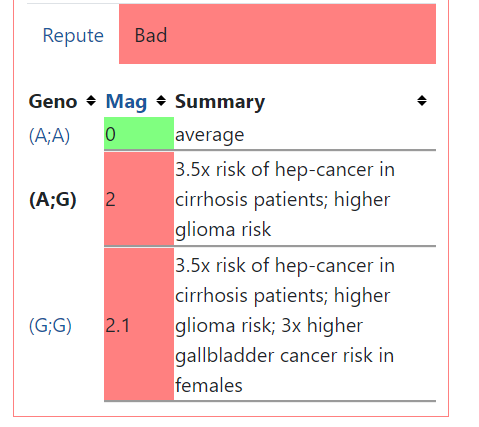

## Inspiration
Some ideas worth exploring:
​
Is the individual in question more susceptible to cancer?\
Does he tend to gain weight?\
Where is his place of origin?\
Which gene determines certain biological feature (cancer susceptibility, fat generation rate, hair color etc.\
How does this phenotype SNPs compare with other similar datasets from the western-world?\
What would be the likely cause of death for this person?\
What are the most likely diseases/illnesses this person is going to face in lifetime?\
What is unique about this dataset?\
What else you can extract from this dataset when it comes to personal trait, intelligence level, ancestry and body makeup?

## **Where is his place of origin?**

In [21]:
origin_rsid= ['rs17822931','rs16891982','rs1426654']
origin = genome[genome['rsid'].isin(origin_rsid)]
origin

,rsid,chromosome,position,genotype
175253,rs16891982,5,33951693,CG
470218,rs1426654,15,48426484,AA
492023,rs17822931,16,48258198,CC


-----------------

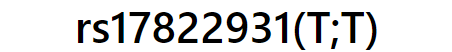
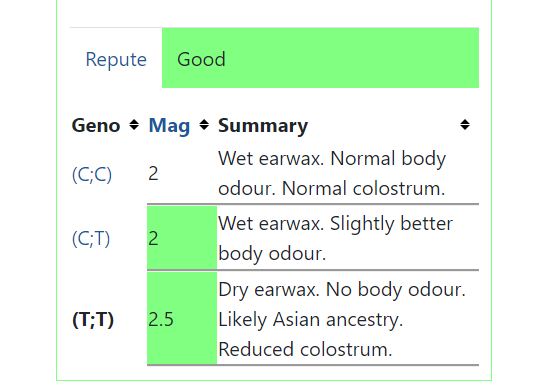

------------------------------
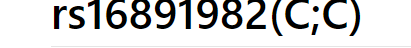
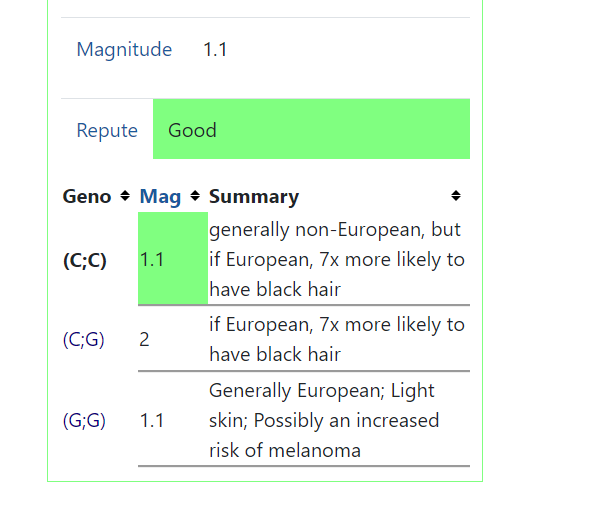

---------------------------------

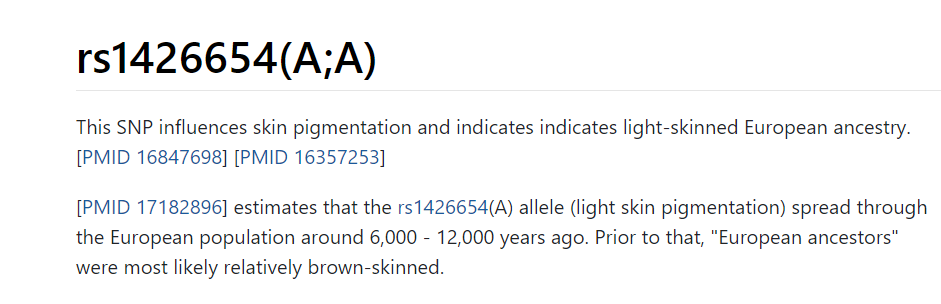

----------------

## **Which gene determines certain biological feature (cancer susceptibility, fat generation rate, hair color etc.**

--------------------
## **Hair color**

In [22]:
hair_rid= genome[genome['rsid'] == 'MC1R']
hair_rid

,rsid,chromosome,position,genotype


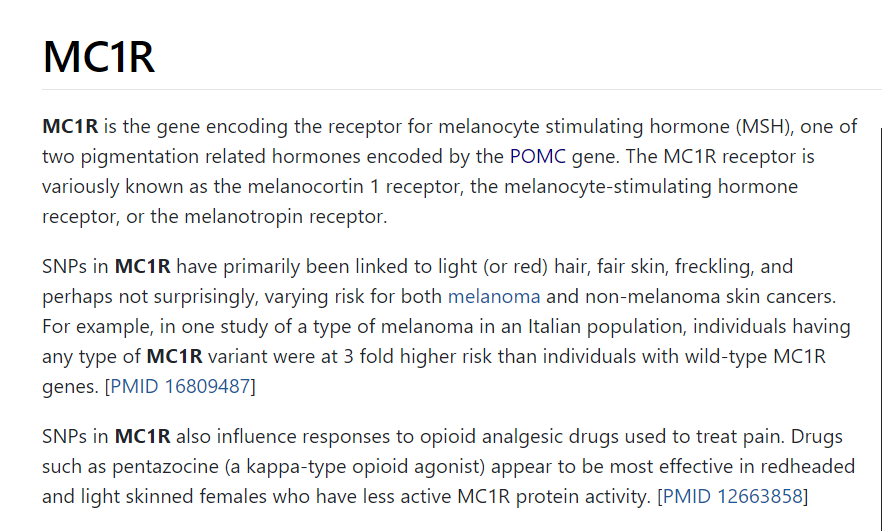

---------------------
## **Cancer susceptible**

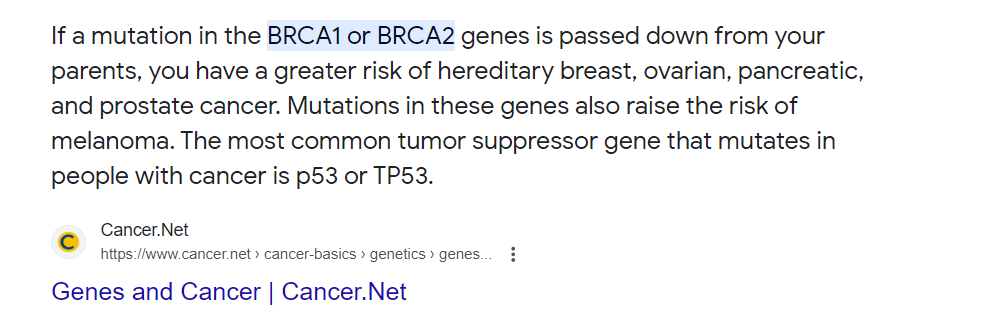

In [23]:
cancer_rsid = ['BRCA1','BRCA2']
cancer_rsid = genome[genome['genotype'].isin(cancer_rsid)]
cancer_rsid

,rsid,chromosome,position,genotype


---------------
> **data donot contain both the genes and hence donot susceptible to cancer** 

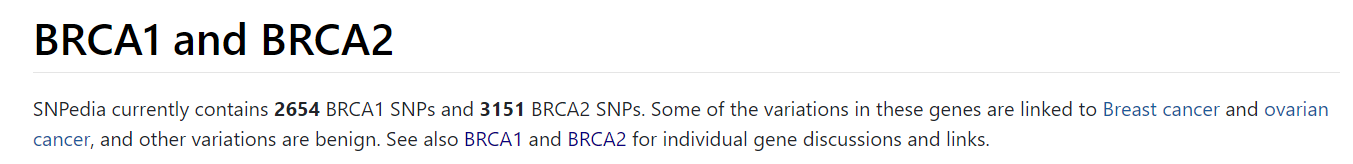

-----------------------